Solving https://www.lesswrong.com/s/gDiScDuMrWNpzwNSJ/p/r3BjssqE4RqmGKwv7.

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
url = "https://raw.githubusercontent.com/H-B-P/d-and-d-sci-aug/main/dset.csv"
df = pd.read_csv(url,index_col=0)

In [28]:
from scipy import optimize

In [3]:
print(df)

     Solar  Lunar  Ocean  Breeze  Flame  Ash  Earth  Void  Doom  Spite
Day                                                                   
1       42     31     33      15     22    7     28    25    32     13
2       41     35      8      10     19    5     54    23    37      7
3       43     38     36      15     22    4     29    19    18      6
4       37     35     20      13     25    5     46    20    25      0
5       36     30     21      13     21    6     49    17    23     31
..     ...    ...    ...     ...    ...  ...    ...   ...   ...    ...
370     59     24     49      13     25    6     19    25    35      0
371     62     30     51      17     20    6     12    24    22      0
372     38     33     52      17     27    5     11    19    22      7
373     37     35     22      10     31    6     37    28    22     13
374     41     35     45      13     30    7     10    28    28      0

[374 rows x 10 columns]


I analyse each of the 10 types of energy in turn

<AxesSubplot:xlabel='Day'>

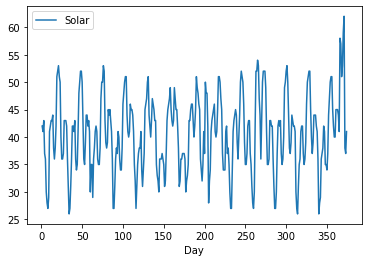

In [27]:
df[['Solar']].plot()

Solar is oscillating, with 13 separated troughs between days 8 and 340. This indicates a period of ~27.66 days. The 'supernova' given in the story appears to occur around day 350, and (surprise!) increases Solar energy. Day 384 is 44 days after the last clear trough, so the two troughs after it should be around days 368 and 395, with peaks in between, around days 354 and 382.

I need good energy on day 384; Solar energy looks desirable (I predict at least 50 strength, if not closer to 60)

<AxesSubplot:xlabel='Day'>

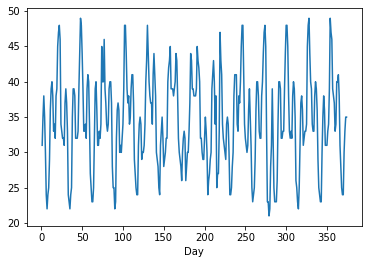

In [36]:
df['Lunar'].plot()

Remarkably similar. In fact, we have the same number of distinct troughs between days 7 and 342; period of ~28 days is basically the same. If Solar and Lunar energies are independent, I similarly get that Lunar energy is excellent. 

This is a fun story about magic energies. Sun and Moon are likely dependent; this will make Lunar energy either a very good idea, or a very bad one. Let's figure out the relationship.

Indeed, if I look at days just past 150 in the Solar energy, we get a slightly smaller peak,, attained twice at days 158 and 163. The corresponding trough in the Lunar energy is attained at days 172 and 177. Let's plot the sum of Solar and Lunar energy, with a 14 day delay.

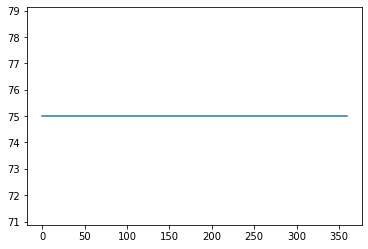

In [93]:
i=14
sol = df['Solar'][0:360].values
lun = df['Lunar'][i:360+i].values
plt.plot(sol+lun)
plt.show()

Nailed it. I hence observe that the amount of Lunar energy on day 384 is 75 - (Solar on day 370) = 16. Lunar energy is a bad idea.

<AxesSubplot:xlabel='Day'>

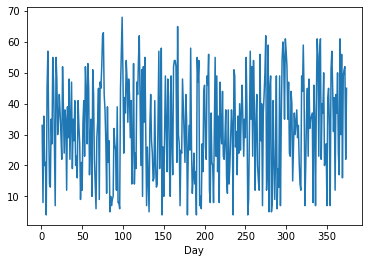

In [94]:
df['Ocean'].plot()

This oscillates rather a lot, and will be very hard to predict on day 384, when I need it. Avoid unless I have no better options; the mean is at least reasonably high.

<AxesSubplot:xlabel='Day'>

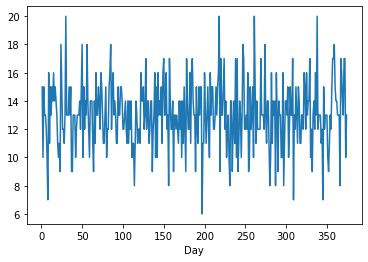

In [96]:
df['Breeze'].plot()

Consistently too small to be useful

<AxesSubplot:xlabel='Day'>

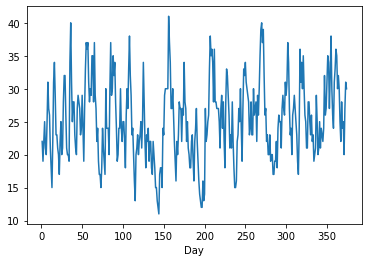

In [98]:
df['Flame'].plot()

Possibly useful; failure change with Flame energy is nontrivial though, and graph is too noisy to eyeball a pattern in it.

<AxesSubplot:xlabel='Day'>

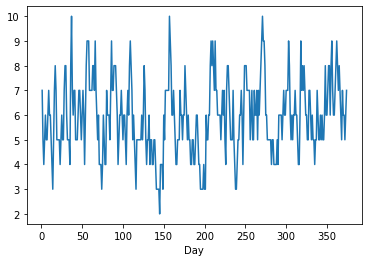

In [99]:
df['Ash'].plot()

Peaks at 10; not good enough. It is slightly time-lagged Flame energy, which is a nice (useless) Easter egg

<AxesSubplot:xlabel='Day'>

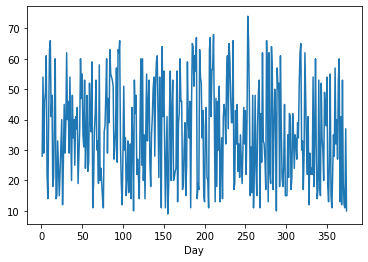

In [100]:
df['Earth'].plot()

Consistently noisy, like Ocean. Check for a relationship

If no better options in the remaining energies, current best solution is Solar+Earth or Solar+Ocean (after identifying which is likely to be higher).

<AxesSubplot:xlabel='Day'>

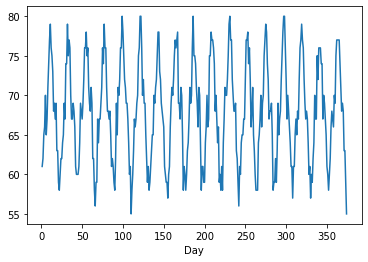

In [105]:
(df['Earth']+df['Ocean']).plot()

Wow. Earth+Ocean is remarkably consistent; on day 384, I expecty to be near a peak; maybe 75 total power. Earth has slightly higher minima, so maybe Earth takes slightly more of the sum. Earth+Solar is nonetheless unlikely to consistently succeed.

However, using Earth+Ocean is also very possible; would need to measure the time period of the fluctuations in the sum to ensure we get a result of >70.

<AxesSubplot:xlabel='Day'>

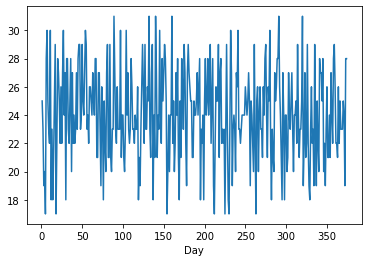

In [101]:
df['Void'].plot()

Void oscillates between ~20 and ~30, and is consistently between these values. This makes it an excellent choice to pair with Solar, which is >50, as my success condition is to obtain strength >70.

<AxesSubplot:xlabel='Day'>

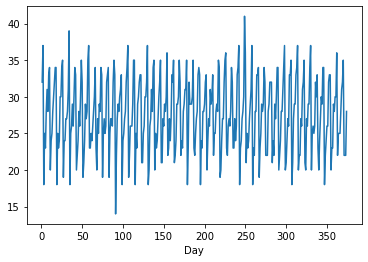

In [102]:
df['Doom'].plot()

Oscillates like clockwork. A better choice than Void, for the same reasons. 
Recall that if I use Void, Doom or Spite with Solar, and the non-Solar value is higher, I lose. This is not a risk with Doom value <40.

<AxesSubplot:xlabel='Day'>

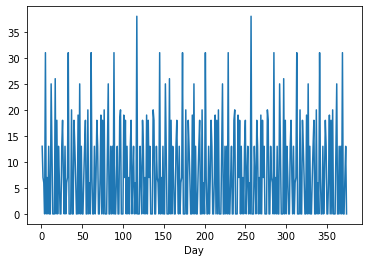

In [103]:
df['Spite'].plot()

Too small too often.

Final selection; Solar + Doom.